# Analyzing Ford GoBike System Data

*by Pankaj <br>
Jun 2020*


## Table of Contents

- Gathering 
- Assessing 
- Cleaning 
- Univariate Exploration
- Bivariate Exploration
- Multivariate Exploration

### Introduction

**Ford GoBike System** is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. <br>

It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company.<br>

The bicycles are available 24 hours a day, seven days a week for periods ranging from a single ride (up to 30 minutes) to a day pass, in 30-minute increments, or customers can purchase an annual subscription which gives them unlimited rides up to 45-minutes in duration. 

### Data

I will be using the dataset for the second half of year 2017 i.e. 2017 Q3 and 2017 Q4

### Gathering Data 

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('2017-fordgobike-tripdata.csv')

### Assessing Data

In [8]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [9]:
#checking the data type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [10]:
#checking the no. of rows and columns
df.shape

(519700, 13)

In [11]:
#checking if variables has null elements
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [12]:
#no. of rows which are duplicate
df.duplicated().sum()

0

In [13]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


### Cleaning Data 

1.) start_time and end_time is not in datetime. <br>
2.) duration is given in seconds but it will be more confortable to get in minutes. <br>
3.) user_type can be set as categorical variable. <br>
4.) Extract day, month and weekday from start_time <br>

In [4]:
df1=df.copy()
#converting end_time and start_time to datetime datatype
df1['start_time']=pd.to_datetime(df1['start_time'])
df1['end_time']=pd.to_datetime(df1['end_time'])

#making a duration in minutes column by diving the duration_sec variable by 60
df1['duration_min']=(df1['duration_sec']/60)

#changing the datatype of user_type to categorical as it has 2 categories i.e. Subscriber and Customer
df1['user_type']=df1['user_type'].astype('category')

#extracting day and month from start time
df1['date']=df1['start_time'].dt.day
df1['month']=df1['start_time'].dt.month
df1['day_of_week']=df1['start_time'].dt.day_name()

#converting day_of_week to categorical variable as it has 7 categories i.e. sun, mon,tues,wed etc.
df1['day_of_week']=df1['day_of_week'].astype('category')

In [15]:
#checking the counts of day of week
df1.day_of_week.value_counts()

Tuesday      87865
Wednesday    87752
Thursday     85243
Monday       81410
Friday       81165
Saturday     50874
Sunday       45391
Name: day_of_week, dtype: int64

In [16]:
#Checking if all the cleaning is done

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

In [17]:
df1.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,date,month,day_of_week
196014,875,2017-10-27 16:03:22.993,2017-10-27 16:17:58.751,181,Grand Ave at Webster St,37.811377,-122.265192,211,Broadway at 40th St,37.827757,-122.256716,1280,Subscriber,14.583333,27,10,Friday
182540,786,2017-10-31 19:39:02.703,2017-10-31 19:52:09.085,58,Market St at 10th St,37.776619,-122.417385,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1001,Subscriber,13.100000,31,10,Tuesday
459931,5689,2017-08-06 16:36:01.213,2017-08-06 18:10:50.296,81,Berry St at 4th St,37.775880,-122.393170,6,The Embarcadero at Sansome St,37.804770,-122.403234,1850,Customer,94.816667,6,8,Sunday
296836,1024,2017-09-29 07:48:09.665,2017-09-29 08:05:13.900,134,Valencia St at 24th St,37.752428,-122.420628,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,728,Subscriber,17.066667,29,9,Friday
64145,476,2017-12-07 10:03:53.616,2017-12-07 10:11:50.103,61,Howard St at 8th St,37.776513,-122.411306,37,2nd St at Folsom St,37.785000,-122.395936,619,Subscriber,7.933333,7,12,Thursday


### Univariate Exploration

#### 1.) Month wise usage of Bike sharing system

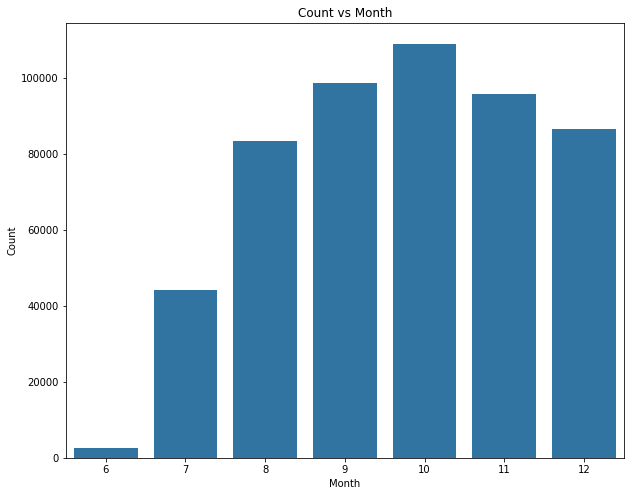

In [5]:
df2=df1.copy();
plt.figure(figsize=(10,8));

base_color=sns.color_palette()[0];
sns.countplot(data=df2,x='month',color=base_color);
plt.title('Count vs Month');
plt.xlabel('Month');
plt.ylabel('Count');

As it can be seen from data clearly that for month 6 i.e. June it is showing a sharp decline for data , this might be due to the not collection of data for June and on last some days the data was collected so its better for analysis that  we ignore the data for month 6

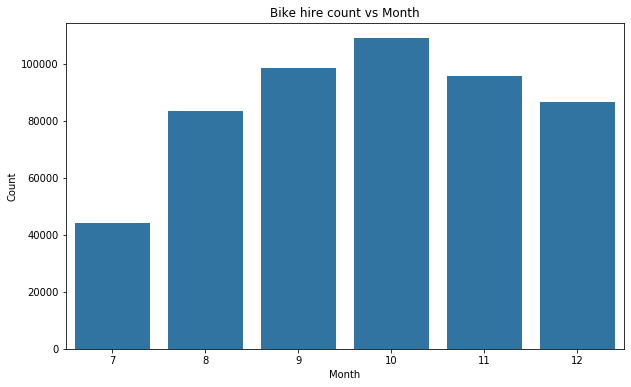

In [36]:
df2=df2.query('month!="6"')
plt.figure(figsize=(10,6))

base_color=sns.color_palette()[0]
sns.countplot(data=df2,x='month',color=base_color)
plt.xlabel('Month');
plt.ylabel('Count');
plt.title('Bike hire count vs Month');

The data is mainly constant for the rest of the half-year other than for month 7.

#### 2.) Date wise usage of Bike sharing system

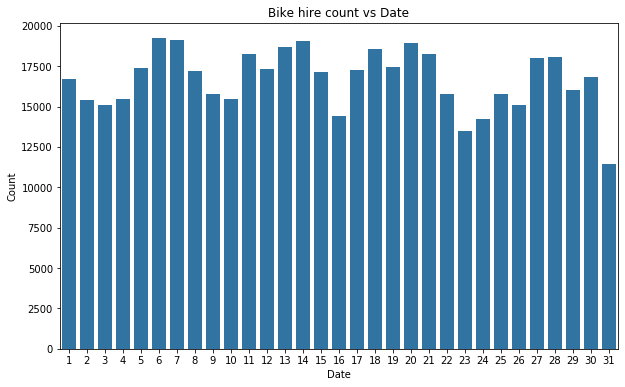

In [37]:
plt.figure(figsize=(10,6))
#using the countplot and getting the count for each date
base_color=sns.color_palette()[0]
sns.countplot(data=df2,x='date',color=base_color)
plt.xlabel('Date');
plt.ylabel('Count');
plt.title('Bike hire count vs Date');

It is mostly constant with slight ups and down. For the Date 31 it is showing the least because as many months didn't have the 31st date which explains the minimum value at it.

#### 3.) Day wise usage of Bike sharing system

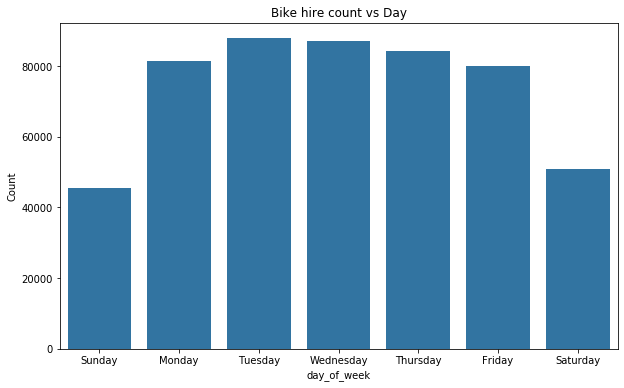

In [38]:
plt.figure(figsize=(10,6))
#making a list of all the day
weekday = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
#making the use of order in countplot to map the variables in weekday list order
base_color=sns.color_palette()[0]
a=sns.countplot(data=df2,x='day_of_week',color=base_color,order=weekday)

plt.ylabel('Count');
plt.title('Bike hire count vs Day');


From this , we can intrepret that many people are using bikes for going to offices/colleges hence the count on weekdays are nearly constant and higher than that on weekends.

####  4.) What is the average time spent on bikes?

In [22]:
df2['duration_sec'].describe()

count    517011.000000
mean       1099.185963
std        3447.216480
min          61.000000
25%         382.000000
50%         596.000000
75%         939.000000
max       86369.000000
Name: duration_sec, dtype: float64

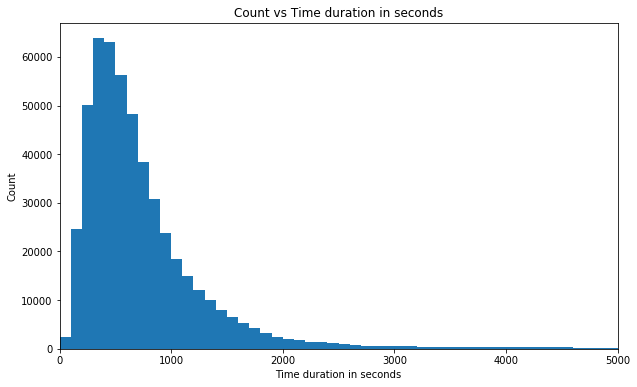

In [23]:
plt.figure(figsize=(10,6))
bin1 = np.arange(0, df2['duration_sec'].max() + 100 , 100);
plt.hist(data = df2 , x = 'duration_sec' , bins = bin1)
plt.xlim(0,5000);
plt.xlabel('Time duration in seconds');
plt.ylabel('Count');
plt.title('Count vs Time duration in seconds');

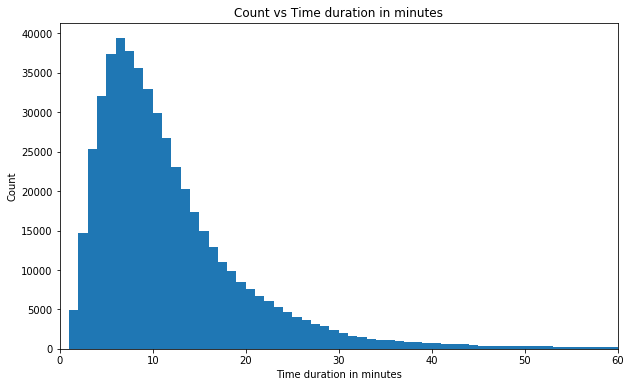

In [24]:
#and we can also see the time duration in minutes
plt.figure(figsize=(10,6));
bin2 = np.arange(0, df2['duration_min'].max() + 1 , 1);
plt.hist(data = df2 , x = 'duration_min' , bins = bin2);
plt.xlim(0,60)

plt.xlabel('Time duration in minutes');
plt.ylabel('Count');
plt.title('Count vs Time duration in minutes');

So from graphs we can interpret that, the people are taking bikes for shorter journies more often, maybe to go to office or super mart or schools etc.

#### 5.)  Which type of users use bikes more

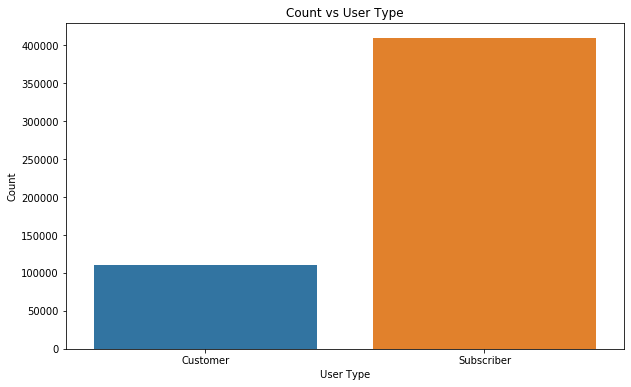

In [25]:
plt.figure(figsize=(10,6))
plt.title('Count vs User Type')
sns.countplot(data=df,x='user_type');
plt.xlabel('User Type');
plt.ylabel('Count');

As it can be seen from plot, Subscriber use bike more which was expected as the people who subscribe will be using bikes more.

### Bivariate Exploration

#### 1.)  Impact on journey time with respect to change in weather 

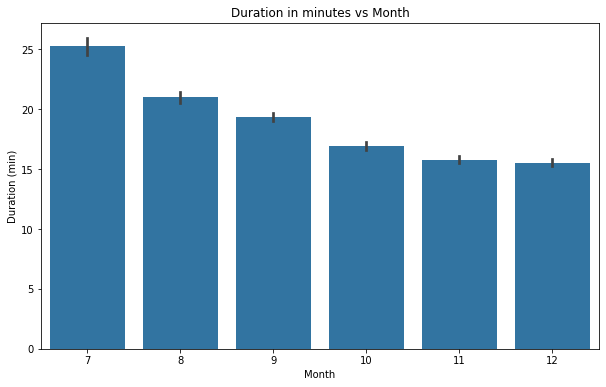

In [26]:
plt.figure(figsize = [10, 6])
base_color=sns.color_palette()[0]

#month_order=bike_data_samp['month'].value_counts.index
sns.barplot(data = df2, x = 'month', color=base_color,y = 'duration_min')
plt.ylabel('Duration (min)');
plt.xlabel('Month');
plt.title('Duration in minutes vs Month');

This explains that, as the winter is approaching or the weather is changing from summer to winter there is a decline in usage of bikes for longer durations which looks feasible as the winter approaches the people will be moving to 4 wheelers more for longer trips.

#### 2.) Analysing the duration of trip with respect to month on both User Type

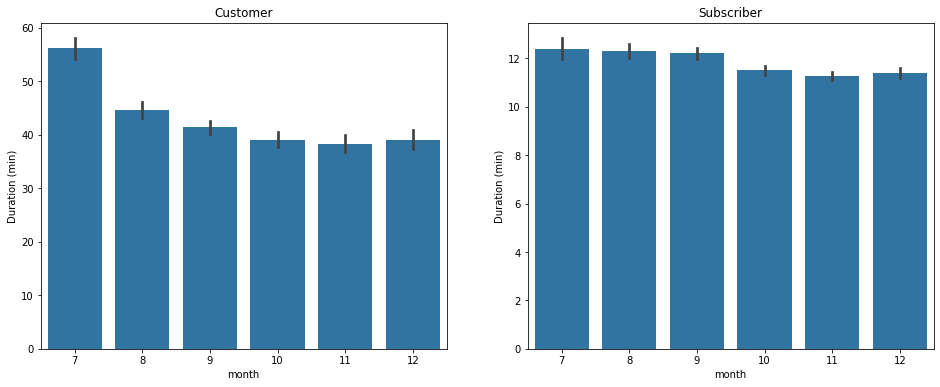

In [27]:
df3=df2.query('user_type=="Customer"')
df4=df2.query('user_type=="Subscriber"')
plt.figure(figsize = [16, 6]);

plt.subplot(1, 2, 1);
sns.barplot(data = df3, x = 'month', color=base_color,y = 'duration_min');
plt.title('Customer');
plt.ylabel('Duration (min)');

plt.subplot(1, 2, 2);
sns.barplot(data = df4, x = 'month', color=base_color,y = 'duration_min');
plt.title('Subscriber');
plt.ylabel('Duration (min)');

Its clear from the graph that the customers are hiring bikes for longer duration and their trips are also becoming shorter by month.

#### 3.) Duration of the trips with respect to the Day?

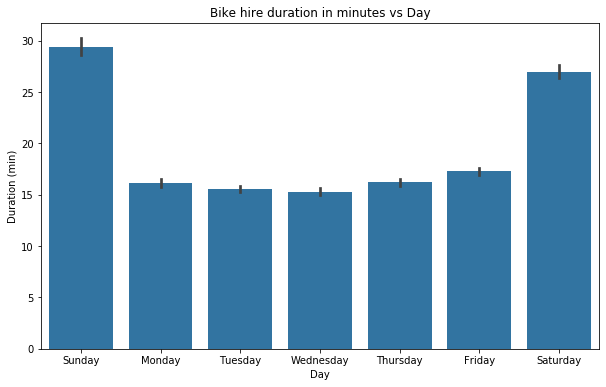

In [39]:
plt.figure(figsize = [10, 6])
base_color=sns.color_palette()[0]
weekday = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

#month_order=bike_data_samp['month'].value_counts.index
sns.barplot(data = df2, x = 'day_of_week',order=weekday, color=base_color,y = 'duration_min')
plt.ylabel('Duration (min)');
plt.xlabel('Day');
plt.title('Bike hire duration in minutes vs Day');

This plot shows that on weekends people rent bike for longer durations on Satuday and Sunday than that on weekends.

#### 4.) Duration of trips in minutes for both user types?

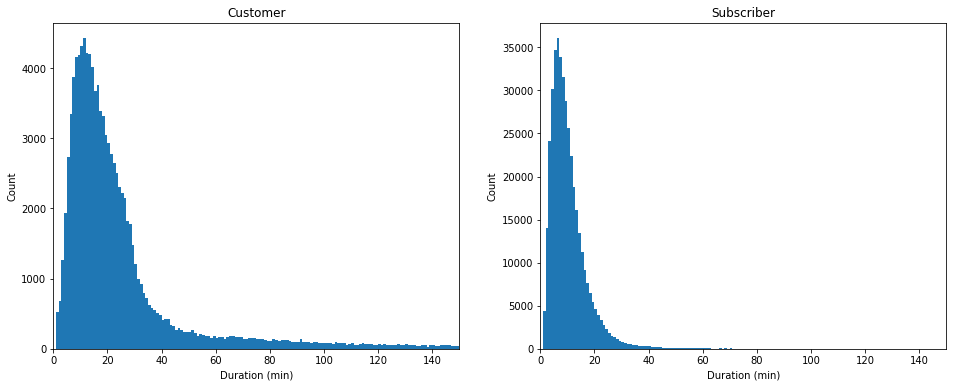

In [29]:
plt.figure(figsize = [16, 6]);

bins = np.arange(0, df2['duration_min'].max() + 1 , 1);
plt.subplot(1, 2, 1);
plt.hist(data = df3, x = 'duration_min', color=base_color,bins=bins);
plt.title('Customer');
plt.xlim(0,150);
plt.xlabel('Duration (min)')
plt.ylabel('Count');

plt.subplot(1, 2, 2);
plt.hist(data = df4, x = 'duration_min', color=base_color,bins=bins);
plt.title('Subscriber');
plt.xlim(0,150);
plt.xlabel('Duration (min)')
plt.ylabel('Count');


From both of the graph proves we can analyse that the subscriber tend to have shorter duration of trip, this looks feasible as well as the daily Subcriber will use bikes more even for shorter trips and the customer will only book for longer trips.

### Multivariate Exploration

#### Analysing the relation between the month,day and duration of bike hire

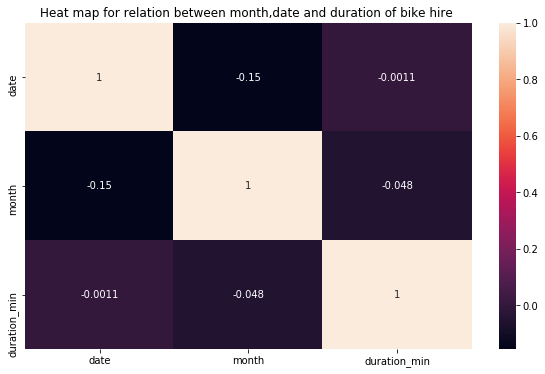

In [7]:
numeric_vars = ['date','month','duration_min']
plt.figure(figsize = [10,6])
sns.heatmap(df2[numeric_vars].corr(),annot = True)
plt.title('Heat map for relation between month,date and duration of bike hire ')
plt.show()

There is a negative correlation between date vs duration and month vs duration.

#### Analysing the Duration of bike hire for various days in particular month

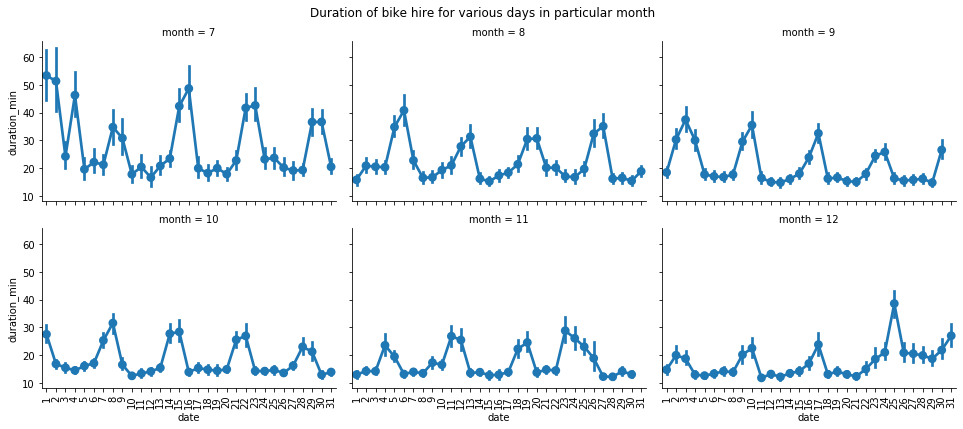

In [35]:
bin1 = np.arange(0,31,1);
g=sns.FacetGrid(data=df2, col='month', size=3,col_wrap=3,aspect = 1.5);
g.map(sns.pointplot,'date', 'duration_min');
g.set_xticklabels(rotation=90);
plt.subplots_adjust(top=0.9);
g.fig.suptitle('Duration of bike hire for various days in particular month'); # can also get the figure from plt.gcf();


It has seen a regular drop in duration of bike hire from month 7 to month 10 with some improvements here and there.

#### Analysing the trend of start hour of bike hire with particular days

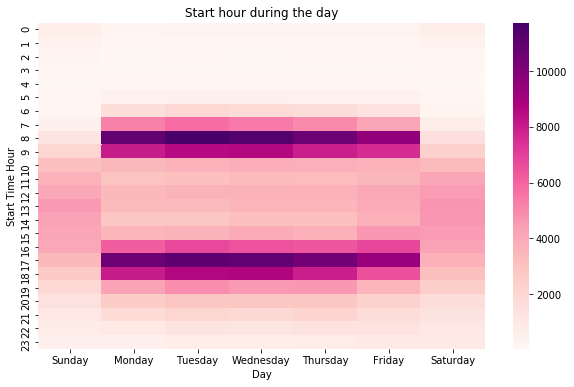

In [33]:
df5 = df2.copy()
plt.figure(figsize = [10,6])

df5['hour']=df5['start_time'].dt.hour
df5=df5.groupby(["hour", "day_of_week"])["bike_id"].size().reset_index()
df5['day_of_week'] = pd.Categorical(df5['day_of_week'], categories=[ 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], ordered=True)
df5 = df5.pivot("hour", "day_of_week", "bike_id")
sns.heatmap(df5, cmap="RdPu");
plt.title("Start hour during the day");
plt.xlabel('Day');
plt.ylabel('Start Time Hour');

The most of the start hour of bike is 8 -9 am in and 5-6 pm on weekends. This results goes in line with the result we predicted earlier that the people are using booking bikes for going to officies  etc.